In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

clicks = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/clicks.csv", usecols = ['created'])
clicks.head()

,created
0,2019-03-06T22:42:12.755Z
1,2019-03-08T10:24:30.641Z
2,2019-03-08T15:24:16.069Z
3,2019-03-06T03:08:51.543Z
4,2019-03-06T03:32:55.570Z


In [19]:
clicks['created'] = pd.to_datetime(clicks['created'])
clicks['Hora'] = clicks['created'].apply(lambda x: x.hour)
clicks['Dia'] = clicks['created'].apply(lambda x: x.day)
clicks['Clicks por hora'] = 1
clicks.head()

,created,Hora,Dia,Clicks por hora
0,2019-03-06 22:42:12.755000+00:00,22,6,1
1,2019-03-08 10:24:30.641000+00:00,10,8,1
2,2019-03-08 15:24:16.069000+00:00,15,8,1
3,2019-03-06 03:08:51.543000+00:00,3,6,1
4,2019-03-06 03:32:55.570000+00:00,3,6,1


In [20]:
clicks_por_hora = clicks.groupby(['Hora', 'Dia']).agg({'Clicks por hora':'sum'})
clicks_por_hora.reset_index(inplace=True)
clicks_por_hora.head()

,Hora,Dia,Clicks por hora
0,0,8,166
1,0,9,16
2,0,10,2
3,0,13,256
4,1,5,2


Text(0,0.5,'Clicks promedio')

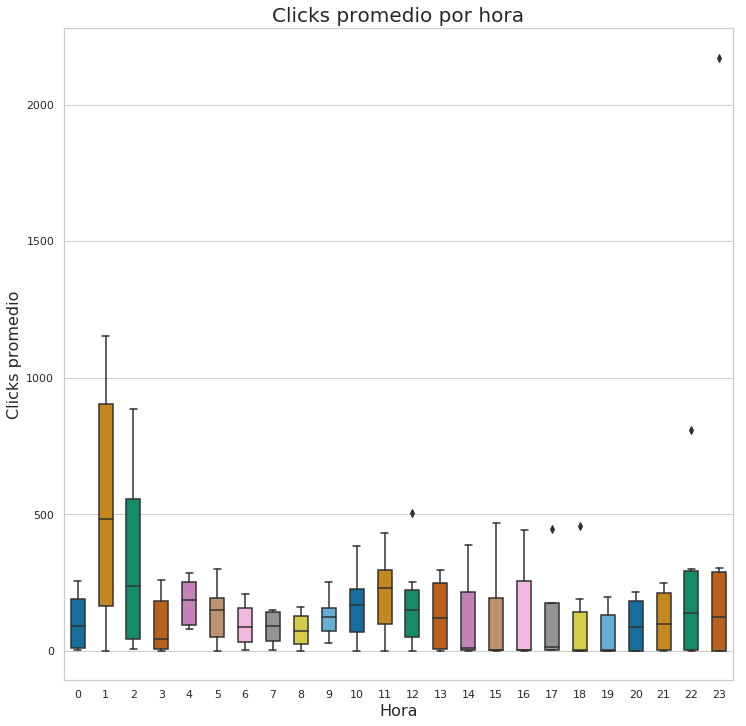

In [21]:
plt.figure(figsize=(12,12))
boxplot_clicks = sns.boxplot(y='Clicks por hora', x='Hora',palette='colorblind',width=0.5,data=clicks_por_hora)
boxplot_clicks.set_title('Clicks promedio por hora',fontsize=20)
boxplot_clicks.set_xlabel('Hora',fontsize=16)
boxplot_clicks.set_ylabel('Clicks promedio',fontsize=16)